Generate conffiles

In [7]:
# a2a
multstr = "0 1 10"
make_rrg = True
make_dring = True
rtnamearr = ["ecmp","su2","su3","32disjoint","racke0"]
rt1arr = ["ecmp","su","su","kdisjoint","racke"]
rt2arr = [0,2,3,32,0]
pwnamearr = ["equal","thisweight"]
with open("/home/annzhou/DRing/src/emp/datacentre/experiments/rerun_sigcomm24/a2a.conf",'w') as f:
    # leafspine
    rtname = "ecmp"
    rt1 = "ecmp"
    rt2 = 0
    pwname = "equal"
    pwfile = f"pathweightfiles/leafspine/{rtname}/pathweight_leafspine_{rtname}_equal_64.txt"
    f.write(f"./run.sh LEAFSPINE MAKE 80 3072 64 leafspine_a2a A2A null {multstr} 0 0 0 0 0 0 {rt1} {rt2} null 0 netpathfiles/netpath_{rtname}_leafspine.txt {pwfile} 64 50 150 200 > m_leafspine_{rtname}_a2a_{pwname}.log\n")
    
    for irtname,rtname in enumerate(rtnamearr):
        rt1 = rt1arr[irtname]
        rt2 = rt2arr[irtname]
        for pwname in pwnamearr:
            # rrg
            pwfile = f"pathweightfiles/rrg/{rtname}/a2a/pathweight_pbr1_rrg_{rtname}_a2a_lp1_barriernocrossover_64.txt" if pwname=="thisweight" else f"pathweightfiles/rrg/{rtname}/pathweight_rrg_{rtname}_equal_64.txt"
            make = "MAKE" if make_rrg else "NOMAKE"
            f.write(f"./run.sh RRG {make} 80 3072 64 rrg_a2a A2A graphfiles/ring_supergraph/rrg/instance1_80_64.edgelist {multstr} 0 0 0 0 0 0 {rt1} {rt2} null 0 netpathfiles/netpath_{rtname}_rrg.txt {pwfile} 64 50 150 200 > m_rrg_{rtname}_a2a_{pwname}.log\n")
            make_rrg = False
            # dring
            pwfile = f"pathweightfiles/dring/{rtname}/a2a/pathweight_pbr1_dring_{rtname}_a2a_lp1_barriernocrossover_64.txt" if pwname=="thisweight" else f"pathweightfiles/dring/{rtname}/pathweight_dring_{rtname}_equal_64.txt"
            make = "MAKE" if make_dring else "NOMAKE"
            f.write(f"./run.sh RRG {make} 80 2988 64 dring_a2a A2A graphfiles/ring_supergraph/double_ring/instance1_80_64.edgelist {multstr} 0 0 0 0 0 0 {rt1} {rt2} null 0 netpathfiles/netpath_{rtname}_dring.txt {pwfile} 64 50 150 200 > m_dring_{rtname}_a2a_{pwname}.log\n")
            make_dring = False

In [13]:
# 16to4-0
trafficname = "16to4-0"
trafficparamstr = "S2S_16_4_0_0"
multstr = "1 11 20"

make_rrg = True
make_dring = True
rtnamearr = ["ecmp","su2","su3","32disjoint","racke0"]
rt1arr = ["ecmp","su","su","kdisjoint","racke"]
rt2arr = [0,2,3,32,0]
pwnamearr = ["equal","thisweight"]

with open(f"/home/annzhou/DRing/src/emp/datacentre/experiments/rerun_sigcomm24/{trafficname}.conf",'w') as f:
    # leafspine
    rtname = "ecmp"
    rt1 = "ecmp"
    rt2 = 0
    pwname = "equal"
    pwfile = f"pathweightfiles/leafspine/{rtname}/pathweight_leafspine_{rtname}_equal_64.txt"
    f.write(f"./run.sh LEAFSPINE MAKE 80 3072 64 leafspine_{trafficname} {trafficparamstr} null {multstr} 0 0 0 0 0 0 {rt1} {rt2} null 0 netpathfiles/netpath_{rtname}_leafspine.txt {pwfile} 64 50 150 200 > m_leafspine_{rtname}_{trafficname}_{pwname}.log\n")
    
    for irtname,rtname in enumerate(rtnamearr):
        rt1 = rt1arr[irtname]
        rt2 = rt2arr[irtname]
        token = ""
        if rt1=="ecmp" or rt1=="su": token = "_pbr1"
        for pwname in pwnamearr:
            # rrg
            pwfile = f"pathweightfiles/rrg/{rtname}/{trafficname}/pathweight{token}_rrg_{rtname}_{trafficname}_lp1_barriernocrossover_64.txt" if pwname=="thisweight" else f"pathweightfiles/rrg/{rtname}/pathweight_rrg_{rtname}_equal_64.txt"
            make = "MAKE" if make_rrg else "NOMAKE"
            f.write(f"./run.sh RRG {make} 80 3072 64 rrg_{trafficname} {trafficparamstr} graphfiles/ring_supergraph/rrg/instance1_80_64.edgelist {multstr} 0 0 0 0 0 0 {rt1} {rt2} null 0 netpathfiles/netpath_{rtname}_rrg.txt {pwfile} 64 50 150 200 > m_rrg_{rtname}_{trafficname}_{pwname}.log\n")
            make_rrg = False
            # dring
            pwfile = f"pathweightfiles/dring/{rtname}/{trafficname}/pathweight{token}_dring_{rtname}_{trafficname}_lp1_barriernocrossover_64.txt" if pwname=="thisweight" else f"pathweightfiles/dring/{rtname}/pathweight_dring_{rtname}_equal_64.txt"
            make = "MAKE" if make_dring else "NOMAKE"
            f.write(f"./run.sh RRG {make} 80 2988 64 dring_{trafficname} {trafficparamstr} graphfiles/ring_supergraph/double_ring/instance1_80_64.edgelist {multstr} 0 0 0 0 0 0 {rt1} {rt2} null 0 netpathfiles/netpath_{rtname}_dring.txt {pwfile} 64 50 150 200 > m_dring_{rtname}_{trafficname}_{pwname}.log\n")
            make_dring = False

In [18]:
# r2r0
trafficname = "r2r0"
trafficparamstr = "S2S_1_1_0_0"
multstr = "10 0 0"

make_rrg = True
make_dring = True
rtnamearr = ["ecmp","su2","su3","32disjoint","racke0"]
rt1arr = ["ecmp","su","su","kdisjoint","racke"]
rt2arr = [0,2,3,32,0]
pwnamearr = ["equal","thisweight"]

with open(f"/home/annzhou/DRing/src/emp/datacentre/experiments/rerun_sigcomm24/{trafficname}.conf",'w') as f:
    # leafspine
    rtname = "ecmp"
    rt1 = "ecmp"
    rt2 = 0
    pwname = "equal"
    pwfile = f"pathweightfiles/leafspine/{rtname}/pathweight_leafspine_{rtname}_equal_64.txt"
    f.write(f"./run.sh LEAFSPINE MAKE 80 3072 64 leafspine_{trafficname} {trafficparamstr} null {multstr} 0 0 0 0 0 0 {rt1} {rt2} null 0 netpathfiles/netpath_{rtname}_leafspine.txt {pwfile} 64 50 150 200 > m_leafspine_{rtname}_{trafficname}_{pwname}.log\n")
    
    for irtname,rtname in enumerate(rtnamearr):
        rt1 = rt1arr[irtname]
        rt2 = rt2arr[irtname]
        token = ""
        if rt1=="ecmp" or rt1=="su": token = "_pbr1"
        for pwname in pwnamearr:
            # rrg
            pwfile = f"pathweightfiles/rrg/{rtname}/{trafficname}/pathweight{token}_rrg_{rtname}_{trafficname}_lp1_barriernocrossover_64.txt" if pwname=="thisweight" else f"pathweightfiles/rrg/{rtname}/pathweight_rrg_{rtname}_equal_64.txt"
            make = "MAKE" if make_rrg else "NOMAKE"
            f.write(f"./run.sh RRG {make} 80 3072 64 rrg_{trafficname} {trafficparamstr} graphfiles/ring_supergraph/rrg/instance1_80_64.edgelist {multstr} 0 0 0 0 0 0 {rt1} {rt2} null 0 netpathfiles/netpath_{rtname}_rrg.txt {pwfile} 64 50 150 200 > m_rrg_{rtname}_{trafficname}_{pwname}.log\n")
            make_rrg = False
            # dring
            pwfile = f"pathweightfiles/dring/{rtname}/{trafficname}/pathweight{token}_dring_{rtname}_{trafficname}_lp1_barriernocrossover_64.txt" if pwname=="thisweight" else f"pathweightfiles/dring/{rtname}/pathweight_dring_{rtname}_equal_64.txt"
            make = "MAKE" if make_dring else "NOMAKE"
            f.write(f"./run.sh RRG {make} 80 2988 64 dring_{trafficname} {trafficparamstr} graphfiles/ring_supergraph/double_ring/instance1_80_64.edgelist {multstr} 0 0 0 0 0 0 {rt1} {rt2} null 0 netpathfiles/netpath_{rtname}_dring.txt {pwfile} 64 50 150 200 > m_dring_{rtname}_{trafficname}_{pwname}.log\n")
            make_dring = False

In [4]:
# cluster
# clustername = "a"
# multstr = "4 7 10"
# clustername = "b"
# multstr = "0 3 10"
clustername = "c"
multstr = "0 11 50"

make_rrg = True
make_dring = True
rtnamearr = ["ecmp","su2","su3","32disjoint","racke0"]
rt1arr = ["ecmp","su","su","kdisjoint","racke"]
rt2arr = [0,2,3,32,0]
pwnamearr = ["equal","thisweight","prevweight"]
trafficname = f"cluster{clustername}"
trafficparamstr = "CLUSTERX"
equalpwstr = "1800 84600 1800 0 0 0"
thisweightpwstr = "1800 84600 1800 1800 84600 1800"
prevweightpwstr = "0 82800 1800 1800 84600 1800"
pwstrarr = [equalpwstr,thisweightpwstr,prevweightpwstr]

with open(f"/home/annzhou/DRing/src/emp/datacentre/experiments/rerun_sigcomm24/{trafficname}.conf",'w') as f:
    # leafspine
    rtname = "ecmp"
    rt1 = "ecmp"
    rt2 = 0
    pwname = "equal"
    pwfile = f"pathweightfiles/leafspine/{rtname}/pathweight_leafspine_{rtname}_equal_64.txt"
    f.write(f"./run.sh LEAFSPINE MAKE 80 3072 64 leafspine_{trafficname} {trafficparamstr} null {multstr} {equalpwstr} {rt1} {rt2} {clustername} 0 netpathfiles/netpath_{rtname}_leafspine.txt {pwfile} 64 50 150 200 > m_leafspine_{rtname}_{trafficname}_{pwname}.log\n")
    
    for irtname,rtname in enumerate(rtnamearr):
        rt1 = rt1arr[irtname]
        rt2 = rt2arr[irtname]
        token = ""
        if rt1=="ecmp" or rt1=="su": token = "_pbr1"
        for ipwname,pwname in enumerate(pwnamearr):
            pwstr = pwstrarr[ipwname]
            # rrg
            pwfile = f"pathweightfiles/rrg/{rtname}/pathweight_rrg_{rtname}_equal_64.txt" if ipwname==0 else f"pathweightfiles/rrg/{rtname}/{trafficname}/pathweight{token}_rrg_{rtname}_{trafficname}_lp1_barriernocrossover_"
            make = "MAKE" if make_rrg else "NOMAKE"
            f.write(f"./run.sh RRG {make} 80 3072 64 rrg_{trafficname} {trafficparamstr} graphfiles/ring_supergraph/rrg/instance1_80_64.edgelist {multstr} {pwstr} {rt1} {rt2} {clustername} 0 netpathfiles/netpath_{rtname}_rrg.txt {pwfile} 64 50 150 200 > m_rrg_{rtname}_{trafficname}_{pwname}.log\n")
            make_rrg = False
            # dring
            pwfile = f"pathweightfiles/dring/{rtname}/pathweight_dring_{rtname}_equal_64.txt" if ipwname==0 else f"pathweightfiles/dring/{rtname}/{trafficname}/pathweight{token}_dring_{rtname}_{trafficname}_lp1_barriernocrossover_"
            make = "MAKE" if make_dring else "NOMAKE"
            f.write(f"./run.sh RRG {make} 80 2988 64 dring_{trafficname} {trafficparamstr} graphfiles/ring_supergraph/double_ring/instance1_80_64.edgelist {multstr} {pwstr} {rt1} {rt2} {clustername} 0 netpathfiles/netpath_{rtname}_dring.txt {pwfile} 64 50 150 200 > m_dring_{rtname}_{trafficname}_{pwname}.log\n")
            make_dring = False

Analyze logfiles

In [8]:
#a2a
import pickle

with open(f'/home/annzhou/DRing/src/emp/datacentre/experiments/rerun_sigcomm24/a2a.pickle', 'rb') as handle:
    datadict = pickle.load(handle)

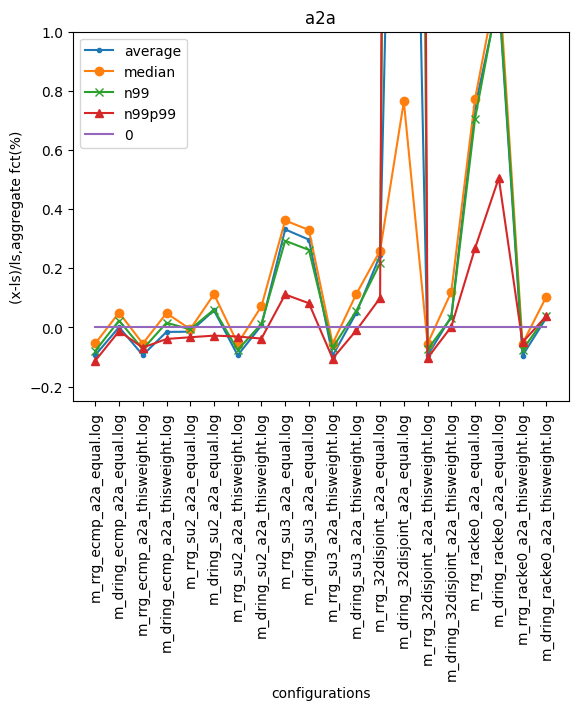

In [11]:
import matplotlib
import matplotlib.pyplot as plt

sumfile = f'/home/annzhou/DRing/src/emp/datacentre/experiments/rerun_sigcomm24/a2a.txt'
logfilelist = list()
averagelist = list()
medianlist = list()
n99list = list()
n99p99list = list()
lsaverage = 0
lsmedian = 0
lsn99 = 0
lsn99p99 = 0
with open(sumfile,'r') as f:
    lines = f.readlines()
    for iline,line in enumerate(lines):
        tokens = line.split()
        if iline==0:
            assert("leafspine" in tokens[0])
            lsaverage = float(tokens[1])
            lsmedian = float(tokens[2])
            lsn99 = float(tokens[3])
            lsn99p99 = float(tokens[4])
        else:
            logfile = tokens[0]
            average = float(tokens[1])
            median = float(tokens[2])
            n99 = float(tokens[3])
            n99p99 = float(tokens[4])
            logfilelist.append(logfile)
            averagelist.append((average-lsaverage)/lsaverage)
            medianlist.append((median-lsmedian)/lsmedian)
            n99list.append((n99-lsn99)/lsn99)
            n99p99list.append((n99p99-lsn99p99)/lsn99p99)

length = len(averagelist)
plt.plot(range(length),averagelist,label="average",marker='.')
plt.plot(range(length),medianlist,label="median",marker='o')
plt.plot(range(length),n99list,label="n99",marker='x')
plt.plot(range(length),n99p99list,label="n99p99",marker='^')
plt.plot(range(length),[0 for _ in range(length)],label="0")
plt.legend()
plt.xlabel("configurations")
plt.ylabel("(x-ls)/ls,aggregate fct(%)")
plt.xticks(ticks=range(length), labels=logfilelist, rotation=90)
plt.ylim(-0.25,1)
plt.title("a2a")
# plt.savefig(f"/home/annzhou/DRing/src/emp/datacentre/experiments/rerun_sigcomm24/a2a.png", bbox_inches='tight', dpi=500)
plt.show()
plt.close()

In [14]:
# 16to4-0
import pickle

with open(f'/home/annzhou/DRing/src/emp/datacentre/experiments/rerun_sigcomm24/16to4-0.pickle', 'rb') as handle:
    datadict = pickle.load(handle)

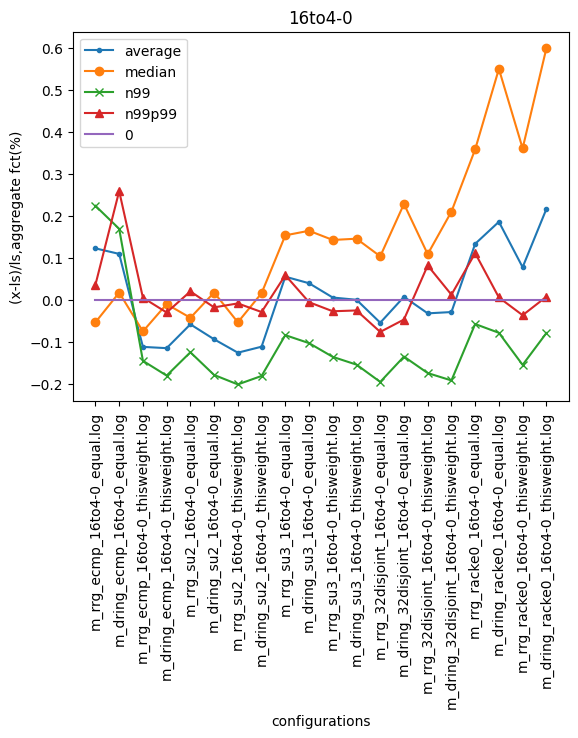

In [16]:
import matplotlib
import matplotlib.pyplot as plt

sumfile = f'/home/annzhou/DRing/src/emp/datacentre/experiments/rerun_sigcomm24/16to4-0.txt'
logfilelist = list()
averagelist = list()
medianlist = list()
n99list = list()
n99p99list = list()
lsaverage = 0
lsmedian = 0
lsn99 = 0
lsn99p99 = 0
with open(sumfile,'r') as f:
    lines = f.readlines()
    for iline,line in enumerate(lines):
        tokens = line.split()
        if iline==0:
            assert("leafspine" in tokens[0])
            lsaverage = float(tokens[1])
            lsmedian = float(tokens[2])
            lsn99 = float(tokens[3])
            lsn99p99 = float(tokens[4])
        else:
            logfile = tokens[0]
            average = float(tokens[1])
            median = float(tokens[2])
            n99 = float(tokens[3])
            n99p99 = float(tokens[4])
            logfilelist.append(logfile)
            averagelist.append((average-lsaverage)/lsaverage)
            medianlist.append((median-lsmedian)/lsmedian)
            n99list.append((n99-lsn99)/lsn99)
            n99p99list.append((n99p99-lsn99p99)/lsn99p99)

length = len(averagelist)
plt.plot(range(length),averagelist,label="average",marker='.')
plt.plot(range(length),medianlist,label="median",marker='o')
plt.plot(range(length),n99list,label="n99",marker='x')
plt.plot(range(length),n99p99list,label="n99p99",marker='^')
plt.plot(range(length),[0 for _ in range(length)],label="0")
plt.legend()
plt.xlabel("configurations")
plt.ylabel("(x-ls)/ls,aggregate fct(%)")
plt.xticks(ticks=range(length), labels=logfilelist, rotation=90)
# plt.ylim(-1,5)
plt.title("16to4-0")
# plt.savefig(f"/home/annzhou/DRing/src/emp/datacentre/experiments/rerun_sigcomm24/a2a.png", bbox_inches='tight', dpi=500)
plt.show()
plt.close()

In [19]:
# r2r0
import pickle

with open(f'/home/annzhou/DRing/src/emp/datacentre/experiments/rerun_sigcomm24/r2r0.pickle', 'rb') as handle:
    datadict = pickle.load(handle)

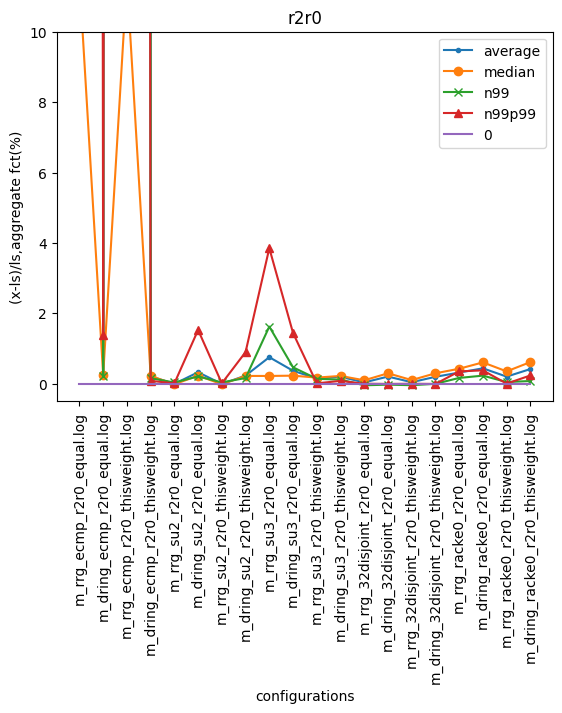

In [22]:
import matplotlib
import matplotlib.pyplot as plt

sumfile = f'/home/annzhou/DRing/src/emp/datacentre/experiments/rerun_sigcomm24/r2r0.txt'
logfilelist = list()
averagelist = list()
medianlist = list()
n99list = list()
n99p99list = list()
lsaverage = 0
lsmedian = 0
lsn99 = 0
lsn99p99 = 0
with open(sumfile,'r') as f:
    lines = f.readlines()
    for iline,line in enumerate(lines):
        tokens = line.split()
        if iline==0:
            assert("leafspine" in tokens[0])
            lsaverage = float(tokens[1])
            lsmedian = float(tokens[2])
            lsn99 = float(tokens[3])
            lsn99p99 = float(tokens[4])
        else:
            logfile = tokens[0]
            average = float(tokens[1])
            median = float(tokens[2])
            n99 = float(tokens[3])
            n99p99 = float(tokens[4])
            logfilelist.append(logfile)
            averagelist.append((average-lsaverage)/lsaverage)
            medianlist.append((median-lsmedian)/lsmedian)
            n99list.append((n99-lsn99)/lsn99)
            n99p99list.append((n99p99-lsn99p99)/lsn99p99)

length = len(averagelist)
plt.plot(range(length),averagelist,label="average",marker='.')
plt.plot(range(length),medianlist,label="median",marker='o')
plt.plot(range(length),n99list,label="n99",marker='x')
plt.plot(range(length),n99p99list,label="n99p99",marker='^')
plt.plot(range(length),[0 for _ in range(length)],label="0")
plt.legend()
plt.xlabel("configurations")
plt.ylabel("(x-ls)/ls,aggregate fct(%)")
plt.xticks(ticks=range(length), labels=logfilelist, rotation=90)
plt.ylim(-0.5,10)
plt.title("r2r0")
# plt.savefig(f"/home/annzhou/DRing/src/emp/datacentre/experiments/rerun_sigcomm24/a2a.png", bbox_inches='tight', dpi=500)
plt.show()
plt.close()

In [1]:
# clustera
import pickle

with open(f'/home/annzhou/DRing/src/emp/datacentre/experiments/rerun_sigcomm24/clustera.pickle', 'rb') as handle:
    datadict = pickle.load(handle)

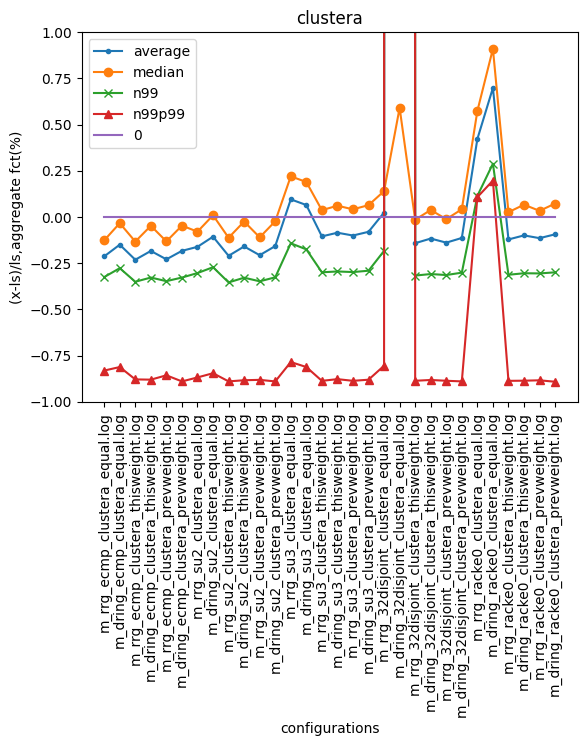

In [3]:
import matplotlib
import matplotlib.pyplot as plt

sumfile = f'/home/annzhou/DRing/src/emp/datacentre/experiments/rerun_sigcomm24/clustera.txt'
logfilelist = list()
averagelist = list()
medianlist = list()
n99list = list()
n99p99list = list()
lsaverage = 0
lsmedian = 0
lsn99 = 0
lsn99p99 = 0
with open(sumfile,'r') as f:
    lines = f.readlines()
    for iline,line in enumerate(lines):
        tokens = line.split()
        if iline==0:
            assert("leafspine" in tokens[0])
            lsaverage = float(tokens[1])
            lsmedian = float(tokens[2])
            lsn99 = float(tokens[3])
            lsn99p99 = float(tokens[4])
        else:
            logfile = tokens[0]
            average = float(tokens[1])
            median = float(tokens[2])
            n99 = float(tokens[3])
            n99p99 = float(tokens[4])
            logfilelist.append(logfile)
            averagelist.append((average-lsaverage)/lsaverage)
            medianlist.append((median-lsmedian)/lsmedian)
            n99list.append((n99-lsn99)/lsn99)
            n99p99list.append((n99p99-lsn99p99)/lsn99p99)

length = len(averagelist)
plt.plot(range(length),averagelist,label="average",marker='.')
plt.plot(range(length),medianlist,label="median",marker='o')
plt.plot(range(length),n99list,label="n99",marker='x')
plt.plot(range(length),n99p99list,label="n99p99",marker='^')
plt.plot(range(length),[0 for _ in range(length)],label="0")
plt.legend()
plt.xlabel("configurations")
plt.ylabel("(x-ls)/ls,aggregate fct(%)")
plt.xticks(ticks=range(length), labels=logfilelist, rotation=90)
plt.ylim(-1,1)
plt.title("clustera")
# plt.savefig(f"/home/annzhou/DRing/src/emp/datacentre/experiments/rerun_sigcomm24/a2a.png", bbox_inches='tight', dpi=500)
plt.show()
plt.close()

In [ ]:
# # test_clustera
# homedir = "/u/az6922/"
# conffile = f"{homedir}DRing/src/emp/datacentre/experiments/test_clustera.conf"
# sumfile = f"{homedir}DRing/src/emp/datacentre/experiments/test_clustera.txt"
# datadict = dict()
# with open(conffile,'r') as f:
#     with open(sumfile,'a') as sumf:
#         lines = f.readlines()
#         for line in lines:
#             tokens = line.split()
#             logfile = tokens[29]
#             sizelist = list()
#             durationlist = list()
#             startlist = list()
#             with open(f"{homedir}DRing/src/emp/datacentre/{logfile}",'r') as logf:
#                 loglines = logf.readlines()
#                 for logline in loglines:
#                     logtokens = logline.split()
#                     if logtokens[0] == "FCT":
#                         durationlist.append(float(logtokens[2]))
#                         sizelist.append(int(logtokens[1]))
#                         startlist.append(float(logtokens[3]))
#             datadict[logfile] = [durationlist,sizelist,startlist]
#             durationlist.sort()
#             sumf.write(f"{logfile}\t{sum(durationlist)/len(durationlist)}\t{durationlist[int(len(durationlist)*0.5)]}\t{durationlist[int(len(durationlist)*0.99)]}\t{durationlist[int(len(durationlist)*0.9999)]}\n")

In [1]:
# clusterb
import pickle

with open(f'/home/annzhou/DRing/src/emp/datacentre/experiments/rerun_sigcomm24/clusterb.pickle', 'rb') as handle:
    datadict = pickle.load(handle)

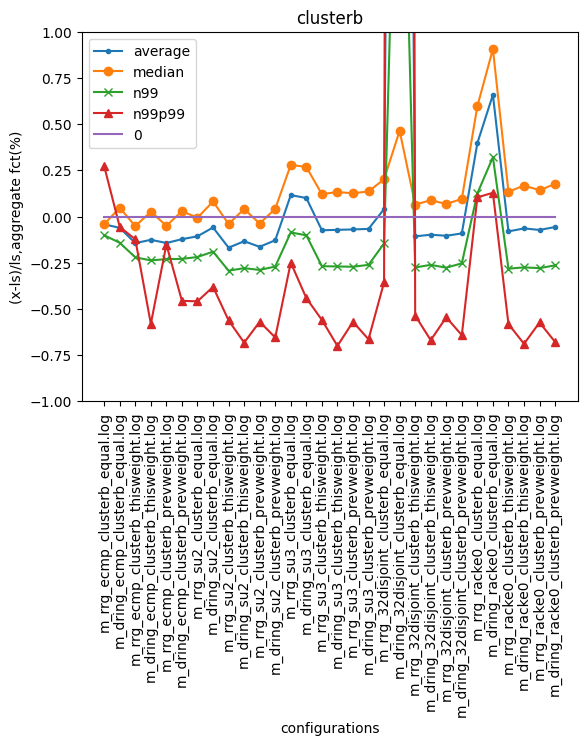

In [3]:
import matplotlib
import matplotlib.pyplot as plt

sumfile = f'/home/annzhou/DRing/src/emp/datacentre/experiments/rerun_sigcomm24/clusterb.txt'
logfilelist = list()
averagelist = list()
medianlist = list()
n99list = list()
n99p99list = list()
lsaverage = 0
lsmedian = 0
lsn99 = 0
lsn99p99 = 0
with open(sumfile,'r') as f:
    lines = f.readlines()
    for iline,line in enumerate(lines):
        tokens = line.split()
        if iline==0:
            assert("leafspine" in tokens[0])
            lsaverage = float(tokens[1])
            lsmedian = float(tokens[2])
            lsn99 = float(tokens[3])
            lsn99p99 = float(tokens[4])
        else:
            logfile = tokens[0]
            average = float(tokens[1])
            median = float(tokens[2])
            n99 = float(tokens[3])
            n99p99 = float(tokens[4])
            logfilelist.append(logfile)
            averagelist.append((average-lsaverage)/lsaverage)
            medianlist.append((median-lsmedian)/lsmedian)
            n99list.append((n99-lsn99)/lsn99)
            n99p99list.append((n99p99-lsn99p99)/lsn99p99)

length = len(averagelist)
plt.plot(range(length),averagelist,label="average",marker='.')
plt.plot(range(length),medianlist,label="median",marker='o')
plt.plot(range(length),n99list,label="n99",marker='x')
plt.plot(range(length),n99p99list,label="n99p99",marker='^')
plt.plot(range(length),[0 for _ in range(length)],label="0")
plt.legend()
plt.xlabel("configurations")
plt.ylabel("(x-ls)/ls,aggregate fct(%)")
plt.xticks(ticks=range(length), labels=logfilelist, rotation=90)
plt.ylim(-1,1)
plt.title("clusterb")
# plt.savefig(f"/home/annzhou/DRing/src/emp/datacentre/experiments/rerun_sigcomm24/a2a.png", bbox_inches='tight', dpi=500)
plt.show()
plt.close()

In [5]:
# clusterc
import pickle

with open(f'/home/annzhou/DRing/src/emp/datacentre/experiments/rerun_sigcomm24/clusterc.pickle', 'rb') as handle:
    datadict = pickle.load(handle)

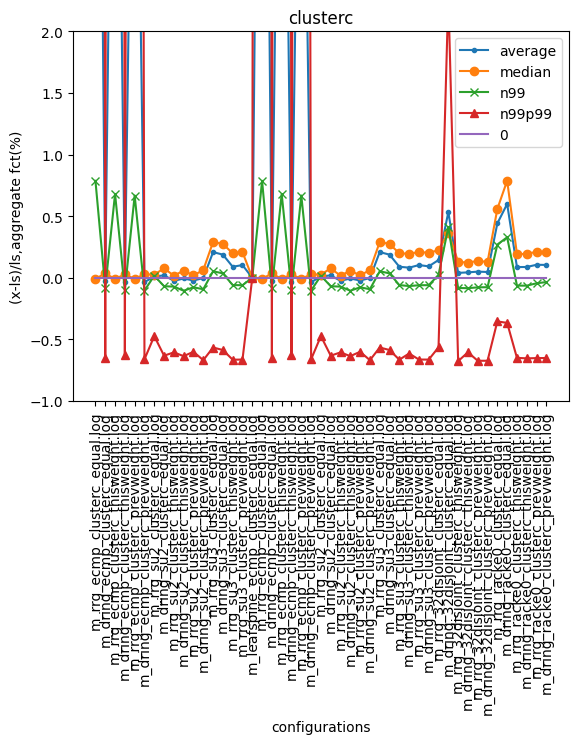

In [8]:
import matplotlib
import matplotlib.pyplot as plt

sumfile = f'/home/annzhou/DRing/src/emp/datacentre/experiments/rerun_sigcomm24/clusterc.txt'
logfilelist = list()
averagelist = list()
medianlist = list()
n99list = list()
n99p99list = list()
lsaverage = 0
lsmedian = 0
lsn99 = 0
lsn99p99 = 0
with open(sumfile,'r') as f:
    lines = f.readlines()
    for iline,line in enumerate(lines):
        tokens = line.split()
        if iline==0:
            assert("leafspine" in tokens[0])
            lsaverage = float(tokens[1])
            lsmedian = float(tokens[2])
            lsn99 = float(tokens[3])
            lsn99p99 = float(tokens[4])
        else:
            logfile = tokens[0]
            average = float(tokens[1])
            median = float(tokens[2])
            n99 = float(tokens[3])
            n99p99 = float(tokens[4])
            logfilelist.append(logfile)
            averagelist.append((average-lsaverage)/lsaverage)
            medianlist.append((median-lsmedian)/lsmedian)
            n99list.append((n99-lsn99)/lsn99)
            n99p99list.append((n99p99-lsn99p99)/lsn99p99)

length = len(averagelist)
plt.plot(range(length),averagelist,label="average",marker='.')
plt.plot(range(length),medianlist,label="median",marker='o')
plt.plot(range(length),n99list,label="n99",marker='x')
plt.plot(range(length),n99p99list,label="n99p99",marker='^')
plt.plot(range(length),[0 for _ in range(length)],label="0")
plt.legend()
plt.xlabel("configurations")
plt.ylabel("(x-ls)/ls,aggregate fct(%)")
plt.xticks(ticks=range(length), labels=logfilelist, rotation=90)
plt.ylim(-1,2)
plt.title("clusterc")
# plt.savefig(f"/home/annzhou/DRing/src/emp/datacentre/experiments/rerun_sigcomm24/a2a.png", bbox_inches='tight', dpi=500)
plt.show()
plt.close()

present the overall results

In [19]:
tabfile = f'/home/annzhou/DRing/src/emp/datacentre/experiments/rerun_sigcomm24/tables.txt'
trafficarr = ["a2a","16to4-0","r2r0","clustera","clusterb","clusterc"]
colnarr = list()
for traffic in trafficarr:
    colnarr.append(f"{traffic},equal")
    colnarr.append(f"{traffic},thisweight")
    if traffic.startswith("cluster"): 
        colnarr.append(f"{traffic},prevweight")
with open(tabfile,'w') as f:
    for topology in ["rrg","dring"]:
        for ipercentile,percentile in enumerate(["median","n99","n99p99"]):
            f.write(f"{topology},{percentile} fct\n")
            for coln in colnarr:
                f.write(f"\t{coln}")
            f.write("\n")
            for routing in ["ecmp","su2","su3","32disjoint","racke0"]:
                f.write(routing)
                for coln in colnarr:
                    tokens = coln.split(',')
                    logfile = f"m_{topology}_{routing}_{tokens[0]}_{tokens[1]}.log"
                    leafspinelogfile = f"m_leafspine_ecmp_{tokens[0]}_equal.log"
                    myval = 0
                    leafspineval = 0
                    with open(f'/home/annzhou/DRing/src/emp/datacentre/experiments/rerun_sigcomm24/{tokens[0]}.txt','r') as fr:
                        lines = fr.readlines()
                        for line in lines:
                            linetokens = line.split()
                            if linetokens[0] == logfile:
                                myval = float(linetokens[ipercentile+2])
                                break
                        for line in lines:
                            linetokens = line.split()
                            if linetokens[0] == leafspinelogfile:
                                leafspineval = float(linetokens[ipercentile+2])
                                break
                    f.write(f"\t{(myval-leafspineval)/leafspineval}")
                f.write("\n")